In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.weights = None
        self.gradient=None
        self.prediction=None
        self.errors=None
        self.loss=None
    def Predictions(self,X):
        self.prediction= np.dot(X, self.weights)
    def error(self,Y):
        self.errors = self.prediction - Y.reshape(-1, 1)
    def Gradient_descent(self,X,alpha,m):
        self.gradient = np.dot(X.T, self.errors)*2/m
        self.weights -= alpha * self.gradient
    def cost_fun(self):
        self.loss = np.mean(np.square(self.errors))
    def train(self, X, Y, alpha=0.01, max_iterations=100, print_interval=5):
        m, n = X.shape
        self.weights = np.random.rand(n, 1)
        for iteration in range(max_iterations):
            self.Predictions(X)
            self.error(Y)
            self.Gradient_descent(X,alpha,m)

            if iteration % print_interval == 0:
                self.cost_fun()
                print(f"Iteration {iteration}, Loss: {self.loss}")

    def predict(self, X):
        if self.weights is None:
            raise ValueError("Model not trained.")
        return np.dot(X, self.weights)

    def get_weights(self):
        if self.weights is None:
            raise ValueError("Model not trained.")
        return self.weights




In [7]:
import pandas as pd
df=pd.read_csv('/content/train.csv')
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [8]:
df.dropna(inplace=True)
X=np.array(df['x'])
if X.ndim==1:
  X=X.reshape(-1,1)
Y=np.array(df['y'])

In [9]:
# Split the data into training and testing sets


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X)

# Add bias term to features
X_train_bias = np.c_[np.ones((X.shape[0], 1)), X]


# Create an instance of the LinearRegression class
model = LinearRegression()


model.train(X_train_bias, Y, alpha=0.0001, max_iterations=1000, print_interval=100)



Iteration 0, Loss: 1700.868700232723
Iteration 100, Loss: 8.135468306335582
Iteration 200, Loss: 8.132797026727555
Iteration 300, Loss: 8.130152401283372
Iteration 400, Loss: 8.127534164046441
Iteration 500, Loss: 8.124942051713886
Iteration 600, Loss: 8.122375803610078
Iteration 700, Loss: 8.119835161660427
Iteration 800, Loss: 8.117319870365424
Iteration 900, Loss: 8.11482967677495


In [10]:
weights = model.get_weights()
print("Weights:", weights)

Weights: [[0.8804105 ]
 [0.98585926]]


In [11]:
predictions = model.predict(X_train_bias)
predictions_val = [["{:.10f}".format(val) for val in sublist] for sublist in predictions]
print("Predictions:")
print(predictions_val)

Predictions:
[['24.5410327678'], ['50.1733735562'], ['15.6682994179'], ['38.3430624231'], ['86.6501662167'], ['36.3713439009'], ['12.7107216347'], ['80.7350106502'], ['25.5268920289'], ['5.8097068070'], ['16.6541586790'], ['16.6541586790'], ['24.5410327678'], ['39.3289216842'], ['54.1168106006'], ['60.0319661672'], ['26.5127512900'], ['72.8481365614'], ['29.4703290733'], ['31.4420475954'], ['67.9188402559'], ['86.6501662167'], ['58.0602476450'], ['54.1168106006'], ['83.6925884334'], ['58.0602476450'], ['49.1875142951'], ['20.5975957234'], ['89.6077440000'], ['48.2016550340'], ['4.8238475459'], ['25.5268920289'], ['42.2864994675'], ['0.8804105015'], ['60.0319661672'], ['92.5653217833'], ['39.3289216842'], ['7.7814253292'], ['21.5834549845'], ['67.9188402559'], ['83.6925884334'], ['0.8804105015'], ['58.0602476450'], ['19.6117364623'], ['36.3713439009'], ['19.6117364623'], ['59.0461069061'], ['51.1592328173'], ['19.6117364623'], ['33.4137661176'], ['84.6784476945'], ['44.2582179897'], ['5

In [12]:
Y

array([ 21.54945196,  47.46446305,  17.21865634,  36.58639803,
        87.28898389,  32.46387493,  10.78089683,  80.7633986 ,
        24.61215147,   6.96331907,  11.23757338,  13.53290206,
        24.60323899,  39.40049976,  48.43753838,  61.69900319,
        26.92832418,  70.4052055 ,  29.34092408,  25.30895192,
        69.02934339,  84.99484703,  57.04310305,  50.5921991 ,
        83.02772202,  57.05752706,  47.95883341,  24.34226432,
        94.68488281,  48.03970696,   7.08132338,  21.99239907,
        42.33151664,   0.32908944,  61.92303698,  91.17716423,
        39.45358014,   5.99606961,  22.59015942,  61.18044414,
        85.02778957,  -1.28631089,  61.94273962,  21.96033347,
        33.66194193,  17.60946242,  58.5630564 ,  52.82390762,
        22.1363481 ,  35.07467353,  86.18822311,  42.63227697,
         4.09817744,  61.2229864 ,  17.70677576,  11.85312574,
        80.23051695,  62.64931741,   9.6168598 ,  20.02797699,
        61.7510743 ,  71.61010303,  23.77154623,  51.90

Mean Squared Error: 8.112364330462828
R-squared: 0.9904124387894627


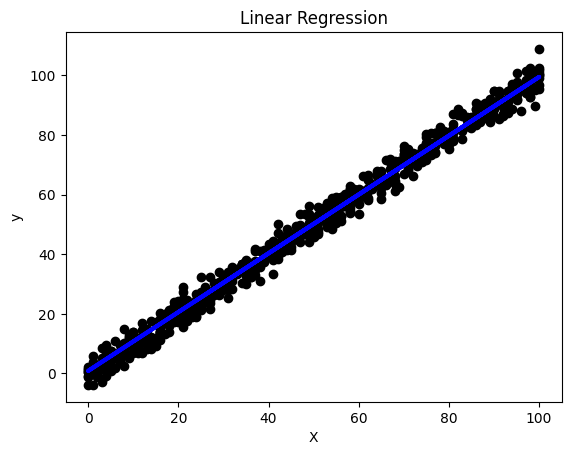

In [13]:
mse = mean_squared_error(Y, predictions)
r2 = r2_score(Y, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the regression line
plt.scatter(X, Y, color='black')
plt.plot(X, predictions, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()